### Bibliotecas

In [1]:
# https://stackoverflow.com/questions/8681688/disable-messages-upon-loading-a-package
# https://www.rdocumentation.org/packages/RSNNS/versions/0.4-11
suppressMessages(library('RSNNS'))

In [2]:
suppressMessages(library('verification'))

### Dataset Circular

In [3]:
#::GMG::Cargo los datos del problema no lineal (nube de puntos ejemplo)
circle <- read.csv('data/circle.csv', header = F)

In [4]:
str(circle)

'data.frame':	100 obs. of  3 variables:
 $ V1: num  -0.9719 -0.553 -0.0949 -0.8096 0.399 ...
 $ V2: num  0.847 -0.577 -0.299 0.857 0.69 ...
 $ V3: int  0 0 1 0 0 0 0 0 0 0 ...


In [5]:
# https://stackoverflow.com/questions/6081439/changing-column-names-of-a-data-frame
colnames(circle) <- c('x1', 'x2', 'class')

In [6]:
str(circle)

'data.frame':	100 obs. of  3 variables:
 $ x1   : num  -0.9719 -0.553 -0.0949 -0.8096 0.399 ...
 $ x2   : num  0.847 -0.577 -0.299 0.857 0.69 ...
 $ class: int  0 0 1 0 0 0 0 0 0 0 ...


In [7]:
#::GMG::Obtengo los índices de los puntos de una de las clases
ind_c <- which(circle[,3]==0)

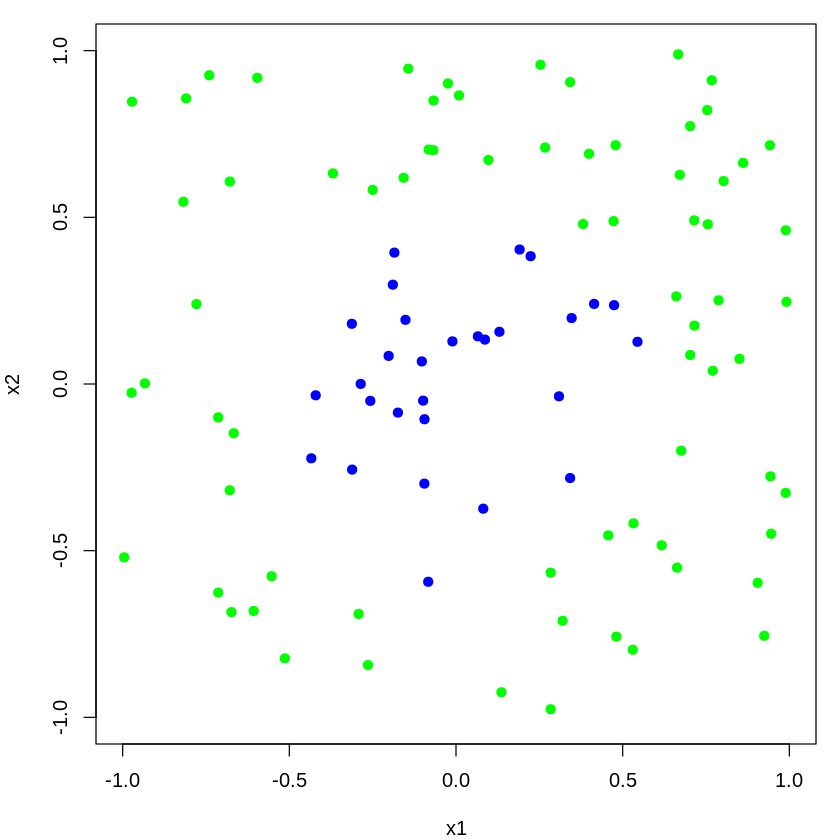

In [8]:
#::GMG::Dibujo los puntos distinguiendo la clase por color
#::nota:: par(mar = ...)
# A numerical vector of the form c(bottom, left, top, right) which gives 
# the number of lines of margin to be specified on the four sides of the plot. 
# The default is c(5, 4, 4, 2) + 0.1
# https://www.rdocumentation.org/packages/graphics/versions/3.5.3/topics/par
par(mar = c(4,4,1,1))
plot(circle[ind_c,1],circle[ind_c,2],
     type='p',
     xlim=c(-1,1),ylim=c(-1,1), 
     xlab = 'x1', ylab = 'x2',
     col = 'green', pch = 19)
points(circle[-ind_c,1],circle[-ind_c,2],
      col='blue', pch = 19)

In [9]:
#circle$class <-  as.factor(circle$class)

In [10]:
#str(circle)

In [11]:
# http://www.cookbook-r.com/Manipulating_data/Renaming_levels_of_a_factor/
#levels(circle$class)

In [12]:
#levels(circle$class) <- c('outside', 'inside')

In [13]:
#str(circle)

In [14]:
#ind_in <- which(circle[,'class']== 'inside')

In [15]:
#str(ind_in)

In [16]:
#str(ind_c)

In [17]:
#ind_out <- which(circle[,'class']== 'outside')

In [18]:
#str(ind_out)

In [19]:
#par(mar = c(4,4,1,1))
#plot(circle[ind_out,'x1'],circle[ind_out,'x2'],
#     type='p',
#     xlim=c(-1,1),ylim=c(-1,1), 
#     xlab = 'x1', ylab = 'x2',
#     col = 'green', pch = 19)
#points(circle[ind_in,'x1'],circle[ind_in,'x2'],
#      col='blue', pch = 19)

### Train Circle

In [20]:
#::GMG::Reproducibilidad
set.seed(1)

In [21]:
#::GMG::Hago una división train/test del dataframe circle
ind <- sort(sample(nrow(circle), nrow(circle)*.8))
circle_train <- circle[ind,]
circle_test <- circle[-ind,]

In [22]:
str(circle_train)

'data.frame':	80 obs. of  3 variables:
 $ x1   : num  -0.9719 -0.553 -0.0949 -0.8096 0.399 ...
 $ x2   : num  0.847 -0.577 -0.299 0.857 0.69 ...
 $ class: int  0 0 1 0 0 0 0 0 0 0 ...


In [23]:
str(circle_test)

'data.frame':	20 obs. of  3 variables:
 $ x1   : num  0.767 0.803 0.661 -0.143 0.85 ...
 $ x2   : num  0.9112 0.6088 0.2628 0.946 0.0755 ...
 $ class: int  0 0 0 0 0 1 0 1 1 1 ...


In [24]:
# https://www.rdocumentation.org/packages/RSNNS/versions/0.4-11/topics/mlp
# mlp(x, y, size = c(5), maxit = 100,
#  initFunc = "Randomize_Weights", initFuncParams = c(-0.3, 0.3),
#  learnFunc = "Std_Backpropagation", learnFuncParams = c(0.2, 0),
#  updateFunc = "Topological_Order", updateFuncParams = c(0),
#  hiddenActFunc = "Act_Logistic", shufflePatterns = TRUE, linOut = FALSE,
#  outputActFunc = if (linOut) "Act_Identity" else "Act_Logistic",
#  inputsTest = NULL, targetsTest = NULL, pruneFunc = NULL,
#  pruneFuncParams = NULL, …)

model_circle <- mlp(
    x = circle_train[,-3], 
    y = circle_train[,3],
    size = c(5), 
    maxit = 1000,
    learnFuncParams = c(0.1, 0),
    inputsTest = circle_test[,-3], 
    targetsTest = circle_test[,3]
)

In [25]:
weightMatrix(model_circle)

,Input_x1,Input_x2,Hidden_2_1,Hidden_2_2,Hidden_2_3,Hidden_2_4,Hidden_2_5,Output_1
Input_x1,0,0,3.331054,-5.7965131,-0.2993063,3.020388,0.6596732,0.0000000
Input_x2,0,0,-5.473068,0.7489815,-0.3906190,6.180775,1.2301846,0.0000000
Hidden_2_1,0,0,0.000000,0.0000000,0.0000000,0.000000,0.0000000,-6.2207413
Hidden_2_2,0,0,0.000000,0.0000000,0.0000000,0.000000,0.0000000,-5.8614616
Hidden_2_3,0,0,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.2255441
Hidden_2_4,0,0,0.000000,0.0000000,0.0000000,0.000000,0.0000000,-6.8459692
Hidden_2_5,0,0,0.000000,0.0000000,0.0000000,0.000000,0.0000000,2.0480263
Output_1,0,0,0.000000,0.0000000,0.0000000,0.000000,0.0000000,0.0000000


In [26]:
extractNetInfo(model_circle)$unitDefinitions

unitNo,unitName,unitAct,unitBias,type,posX,posY,posZ,actFunc,outFunc,sites
1,Input_x1,-0.6785640121,-0.0392043,UNIT_INPUT,1,0,0,Act_Identity,Out_Identity,
2,Input_x2,0.6072930098,0.1275088,UNIT_INPUT,2,0,0,Act_Identity,Out_Identity,
3,Hidden_2_1,0.0002486946,-2.7149470,UNIT_HIDDEN,1,2,0,Act_Logistic,Out_Identity,
4,Hidden_2_2,0.8541005254,-2.6210256,UNIT_HIDDEN,2,2,0,Act_Logistic,Out_Identity,
5,Hidden_2_3,0.3817284405,-0.4480965,UNIT_HIDDEN,3,2,0,Act_Logistic,Out_Identity,
6,Hidden_2_4,0.1635375619,-3.3361533,UNIT_HIDDEN,4,2,0,Act_Logistic,Out_Identity,
7,Hidden_2_5,0.7800171375,0.9663143,UNIT_HIDDEN,5,2,0,Act_Logistic,Out_Identity,
8,Output_1,0.0768801868,1.9582945,UNIT_OUTPUT,1,4,0,Act_Logistic,Out_Identity,


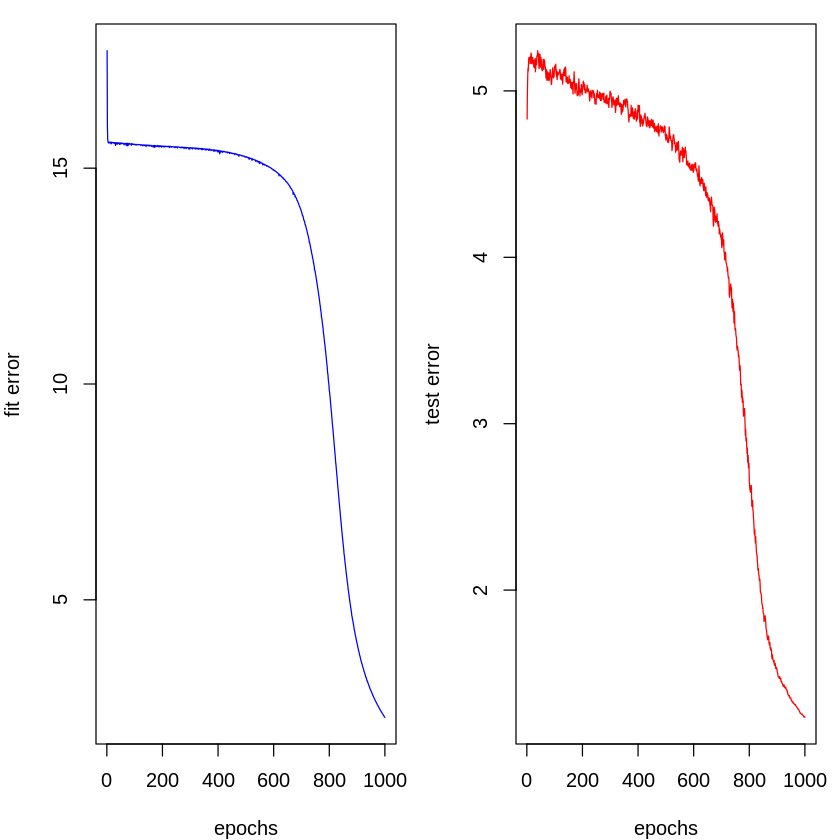

In [27]:
par(mfrow=c(1,2), mar = c(4,4,1,1))
plot(model_circle$IterativeFitError, 
     xlab = 'epochs', ylab = 'fit error', 
     type = 'l', col = 'blue')
plot(model_circle$IterativeTestError, 
     xlab = 'epochs', ylab = 'test error', 
     type = 'l', col = 'red')

In [28]:
str(fitted.values(model_circle))

 num [1:80, 1] 0.0213 0.206 0.8243 0.0122 0.0846 ...


In [29]:
str(model_circle$fitted.values)

 num [1:80, 1] 0.0213 0.206 0.8243 0.0122 0.0846 ...


In [30]:
str(model_circle$fittedTestValues)

 num [1:20, 1] 0.0521 0.0567 0.2846 0.0235 0.1385 ...


In [31]:
#str(fittedTestValues(model_circle))

In [32]:
circle_train[,'class']

[1] 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
[39] 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
[77] 0 0 0 0

In [33]:
ifelse(test = as.vector(fitted.values(model_circle)) > 0.5,1,0)

[1] 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1
[39] 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
[77] 0 0 0 0

In [34]:
#::GMG::Matriz de confusion
confusionMatrix(targets = circle_train[,3],
                predictions = ifelse(test = as.vector(fitted.values(model_circle)) > 0.5,1,0))

       predictions
targets  0  1
      0 59  0
      1  0 21

In [35]:
circle_test[,'class']

[1] 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0

In [36]:
ifelse(test = as.vector(model_circle$fittedTestValues) > 0.5,1,0)

[1] 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0

In [37]:
confusionMatrix(targets = circle_test[,3],
                predictions = ifelse(test = as.vector(model_circle$fittedTestValues) > 0.5,1,0))

       predictions
targets  0  1
      0 12  0
      1  1  7

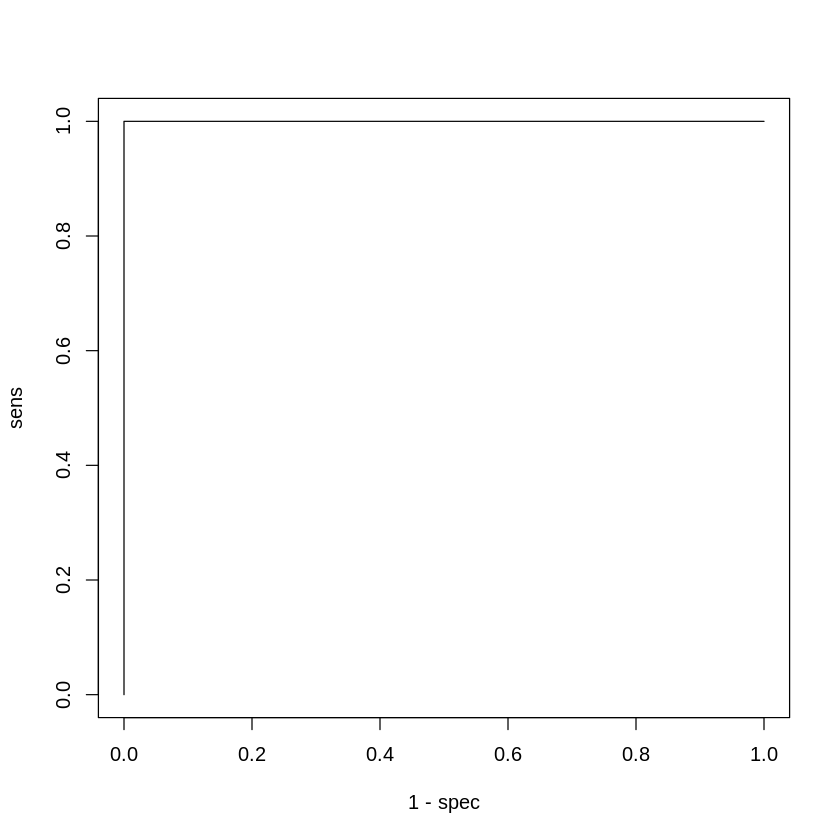

In [38]:
#::GMG::Curva ROC
plotROC(T = ifelse(test = as.vector(fitted.values(model_circle)) > 0.5,1,0), 
        D = circle_train[,3])

In [39]:
roc.area(obs = circle_train[,'class'], 
         pred = ifelse(test = as.vector(fitted.values(model_circle)) > 0.5,1,0)
        )$A

[1] 1

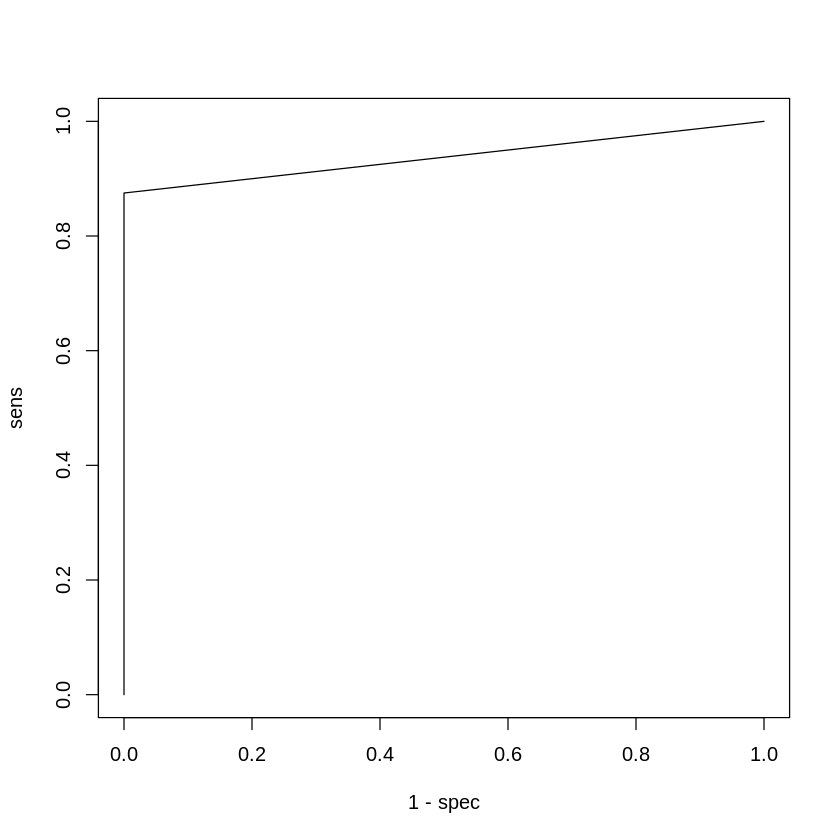

In [40]:
#::GMG::Curva ROC
plotROC(T = ifelse(test = as.vector(model_circle$fittedTestValues) > 0.5,1,0), 
        D = circle_test[,3])

In [41]:
roc.area(obs = circle_test[,'class'], 
         pred = ifelse(test = as.vector(model_circle$fittedTestValues) > 0.5,1,0)
        )$A

Warning message in wilcox.test.default(pred[obs == 1], pred[obs == 0], alternative = "great"):
“cannot compute exact p-value with ties”

[1] 0.9375

### Optimización $\eta$ y h

Si se fija el número máximo de épocas en 1000. ¿Qué número de neuronas ocultas y qué valor de la tasa de aprendizaje (eta) es óptimo para este problema? (basta una solución aproximada).

#### Tasa de aprendizaje

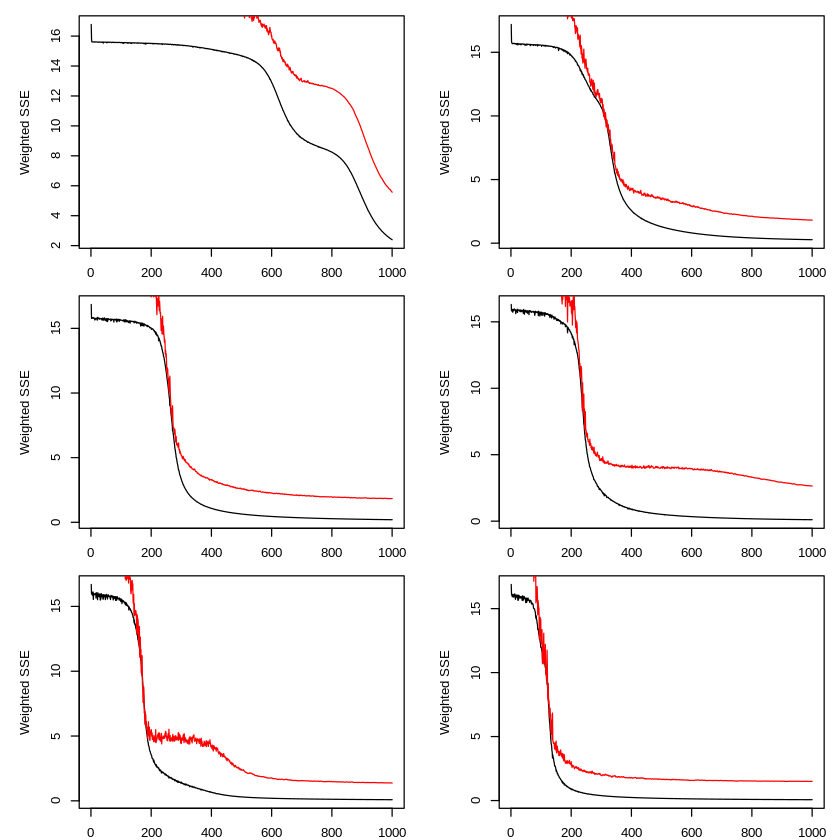

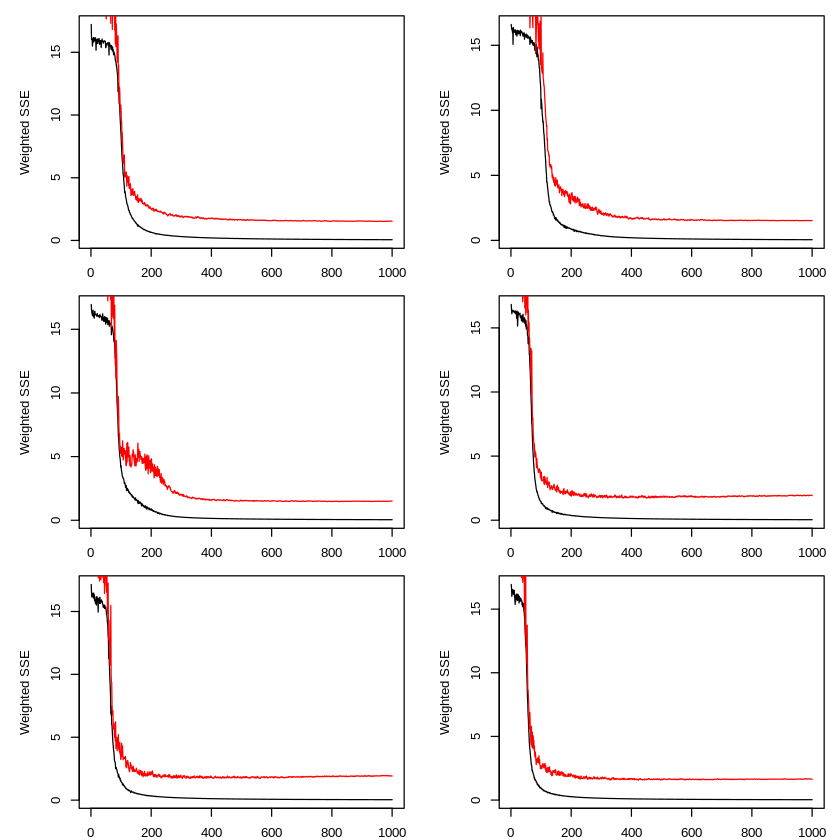

In [42]:
#::GMG::Pruebo con la tasa de aprendizaje
#::nota::uso el método utilizado en la primera sesión de prácticas con RSNNS
par(mar = c(2,5,1,1), mfrow=c(3,2))
for (i in 1:12) {
  model <- mlp(x = circle_train[,-3], 
               y = circle_train[,3],
               size = c(5), 
               maxit = 1000,
               learnFuncParams = c(i*0.1, 0),
               inputsTest = circle_test[,-3], 
               targetsTest = circle_test[,3]
              ) 
  plotIterativeError(model)
}

#### Neuronas ocultas

In [43]:
#::GMG::Pruebo ahora con el número de neuronas ocultas usando AUC
#       como métrica y mantiendo fijo el learning rate
aucTRAIN <- aucTEST <- vector("numeric", length = 10)
for (i in 1:10) {
  model <- mlp(x = circle_train[,-3], 
               y = circle_train[,3],
               size = c(i), 
               maxit = 1000,
               learnFuncParams = c(0.1, 0),
               inputsTest = circle_test[,-3], 
               targetsTest = circle_test[,3]
              )
  #::nota::lo tengo calculado ya en el propio modelo
  # fitted.values(model)
  # model$fitted.values
  #predTRAIN <- predict(model,circle_train[,-3])
  aucTRAIN[i] <- roc.area(circle_train[,3], model$fitted.values)$A
  #::nota::lo tengo ya calculado en el propio modelo
  # model$fittedTestValues
  #predTEST <- predict(model,circle_test[,-3])
  aucTEST[i] <- roc.area(circle_test[,3], model$fittedTestValues)$A
}

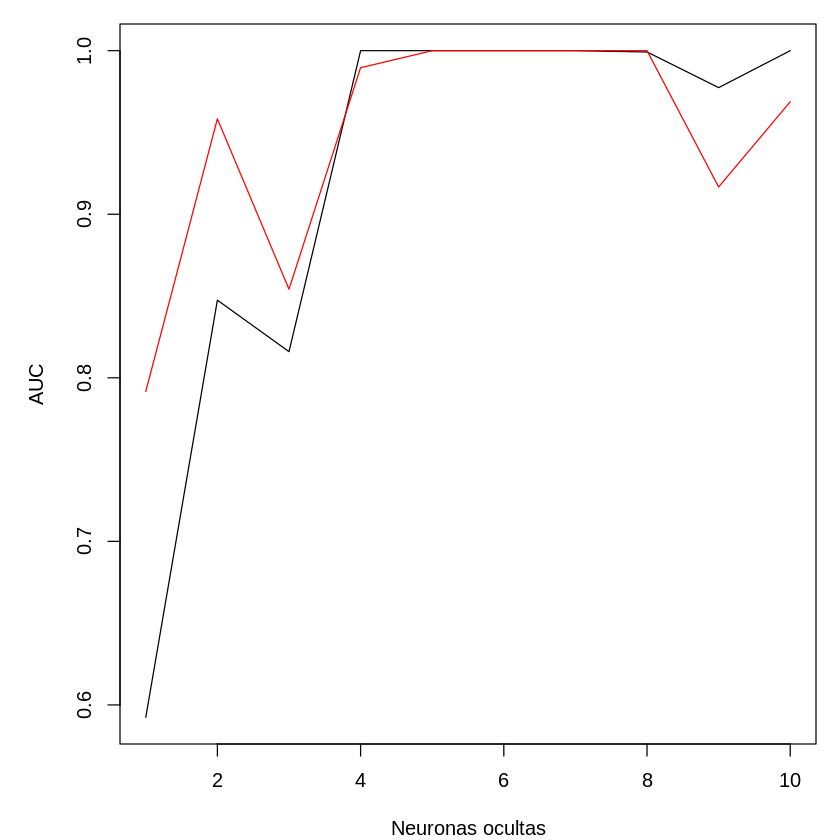

In [44]:
par(mar = c(4,5,1,1))
plot(1:10,aucTRAIN,type = "l", col = "black", ylab = "AUC", xlab = "Neuronas ocultas")
lines(1:10,aucTEST,col = "red")

#### Combinación learning rate y neuronas ocultas

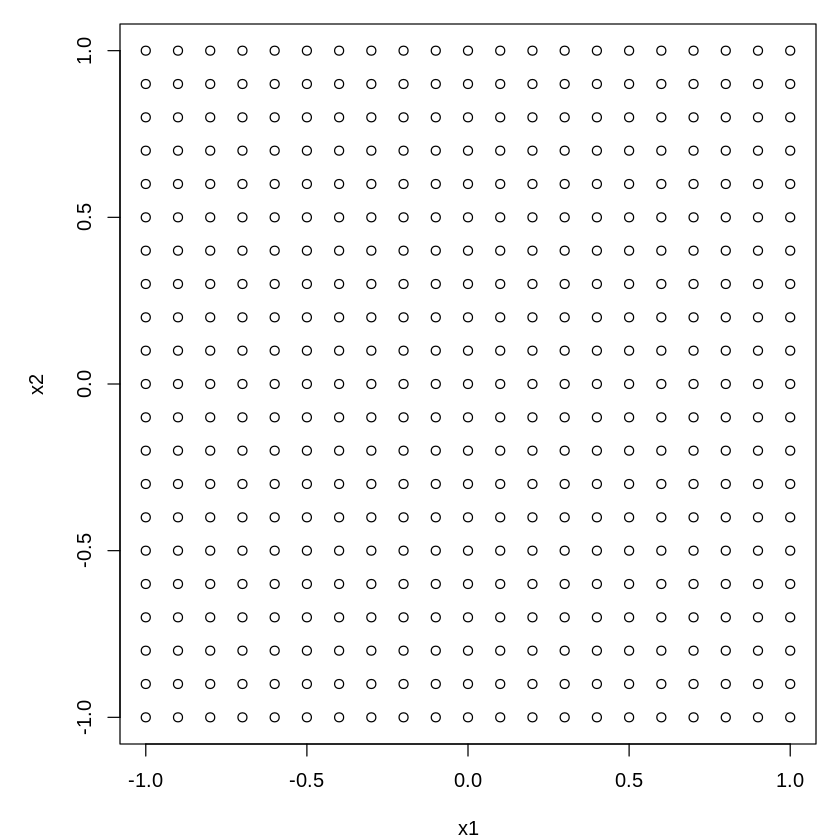

In [45]:
# Construcción de la rejilla
par(mar = c(4,5,1,1))
x1 <- seq(from = -1, to = 1, by = 0.1)
n <- length(x1)
x1 <- rep(x1,n)
m <- 0
x2 <- vector("numeric", length(x1))
for (i in 1:n) {
  m <- (i-1)*n + 1
  x2[m:(i*n)] <- rep(x1[i],n)
}
plot(x1,x2)

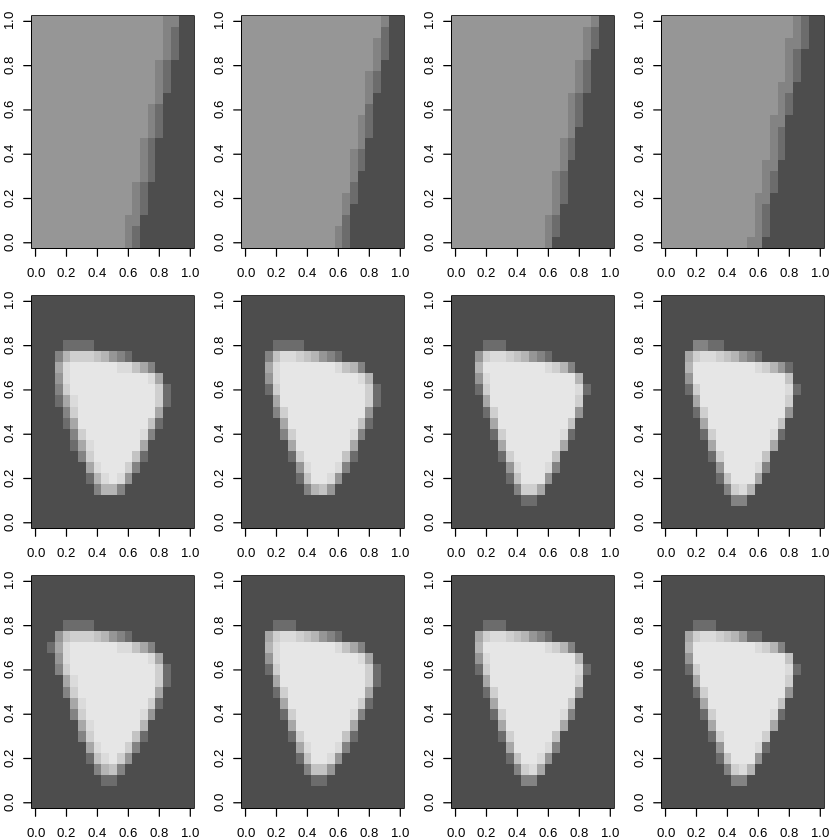

In [46]:
par(mar = c(2,2,1,1), mfrow=c(3,4))
for (j in c(1,3,5)){
  for (i in 4:7) {
    model <- mlp(x = circle_train[,-3], 
                 y = circle_train[,3],
                 size = c(j), 
                 maxit = 1000,
                 learnFuncParams = c(i*0.1, 0)
                 #inputsTest = circle_test[,-3], 
                 #targetsTest = circle_test[,3]
                )
    pred <- predict(model,cbind(x1,x2))
    image(matrix(pred, nrow = n, ncol = n), zlim = c(0,1), col = gray.colors(10))
    
  }
}

**::DUDA::** ¿CV con caret?